# Autumn 2024 ADSP 31009 ON1 Machine Learning & Predictive Analytics Final Project - Thyroid Disease Prediction

##  Background: _____
Reading:
- https://link.springer.com/article/10.1007/s44196-023-00388-2
- https://iopscience.iop.org/article/10.1088/1742-6596/1963/1/012140/pdf

## Dataset Background: https://archive.ics.uci.edu/dataset/102/thyroid+disease

## Dataset Download: https://archive.ics.uci.edu/static/public/102/thyroid+disease.zip

To download the zip folder from the source

In [585]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
            
source_zip_file_url = 'https://archive.ics.uci.edu/static/public/102/thyroid+disease.zip'
local_zip_file_location = "./data/thyroid+disease.zip"
download_url(source_zip_file_url, local_zip_file_location)

To extract the zip archive file into a folder

In [587]:
import zipfile

zip_file = zipfile.ZipFile(file = local_zip_file_location, mode='r')
local_folder_location = "./data/thyroid+disease"
zip_file.extractall(local_folder_location)

## Similar projects done on Thyroid Disease Prediction:
- https://www.kaggle.com/code/adiii1652/thyroid-disease-analysis
- https://www.kaggle.com/code/anubhavmaverick/thyroid-missing-value-algorithm

## Start of Project Analysis

### Import necessary packages

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import BayesianRidge
# from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
warnings.filterwarnings('ignore')

### For clarity, addititional step to reorgnanize the dataset is performed. Here are the steps that are performed after the .zip file is unzipped
1. new folder ann, archive_thyroid_disease, domain_knowledge, new_thyroid, questionable_data are created under the throid+disease folder (associated code to do so programatically as attached below)
2. the file structure for the files moved is as below

Code to programaically create the folders and move files

In [594]:
base_dir = "./data/thyroid+disease/"
!mkdir {base_dir}/ann
!mkdir {base_dir}/archive_thyroid_disease
!mkdir {base_dir}/domain_knowledge
!mkdir {base_dir}/new_thyroid
!mkdir {base_dir}/questionable_data

!find {base_dir} -maxdepth 1 -name "ann*" ! -path {base_dir}/ann -exec mv {{}} {base_dir}/ann \;
!mv {base_dir}/thyroid0387* {base_dir}/archive_thyroid_disease/
!mv {base_dir}/thyroid.theory {base_dir}/domain_knowledge/
!mv {base_dir}/new-thyroid* {base_dir}/new_thyroid
!mv {base_dir}/hypothyroid* {base_dir}/questionable_data/
!mv {base_dir}/sick-euthyroid* {base_dir}/questionable_data/

mkdir: ./data/thyroid+disease//ann: File exists
mkdir: ./data/thyroid+disease//archive_thyroid_disease: File exists
mkdir: ./data/thyroid+disease//domain_knowledge: File exists
mkdir: ./data/thyroid+disease//new_thyroid: File exists
mkdir: ./data/thyroid+disease//questionable_data: File exists


File structure of the folder

In [596]:
# From https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
from pathlib import Path

# prefix components:
space =  '    '
branch = '│   '
# pointers:
tee =    '├── '
last =   '└── '


def tree(dir_path: Path, prefix: str=''):
    """A recursive generator, given a directory Path object
    will yield a visual tree structure line by line
    with each line prefixed by the same characters
    """    
    contents = list(dir_path.iterdir())
    # contents each get pointers that are ├── with a final └── :
    pointers = [tee] * (len(contents) - 1) + [last]
    for pointer, path in zip(pointers, contents):
        yield prefix + pointer + path.name
        if path.is_dir(): # extend the prefix and recurse:
            extension = branch if pointer == tee else space 
            # i.e. space because last, └── , above so no more |
            yield from tree(path, prefix=prefix+extension)

In [597]:
for line in tree(Path("./data/thyroid+disease/")):
    print(line)

├── ann
│   ├── ann-train.data
│   ├── ann-Readme
│   ├── ann-thyroid.names
│   └── ann-test.data
├── costs
│   ├── ann-thyroid.README
│   ├── ann-thyroid.delay
│   ├── ann-thyroid.expense
│   ├── ann-thyroid.group
│   ├── Index
│   ├── .ipynb_checkpoints
│   │   └── Index-checkpoint
│   └── ann-thyroid.cost
├── allrep.names
├── archive_thyroid_disease
│   ├── thyroid0387.names
│   └── thyroid0387.data
├── allbp.test
├── allhypo.names
├── allhypo.test
├── dis.data
├── allrep.data
├── allhyper.data
├── sick.names
├── sick.data
├── dis.names
├── allhyper.test
├── allrep.test
├── dis.test
├── sick.test
├── new_thyroid
│   ├── new-thyroid.names
│   └── new-thyroid.data
├── questionable_data
│   ├── sick-euthyroid.names
│   ├── hypothyroid.data
│   ├── sick-euthyroid.data
│   └── hypothyroid.names
├── allhypo.data
├── domain_knowledge
│   └── thyroid.theory
├── Index
├── allbp.data
├── .ipynb_checkpoints
│   ├── allbp-checkpoint.data
│   ├── allrep-checkpoint.names
│   ├── dis-checkpoint.na

### Dataset description

In [599]:
from IPython.display import Markdown, display

display(Markdown("./data/thyroid+disease/HELLO"))

          General Description of Thyroid Disease Databases 
                        and Related Files

This directory contains 6 databases, corresponding test set, and 
corresponding documentation.  They were left at the University of
California at Irvine by Ross Quinlan during his visit in 1987 for
the 1987 Machine Learning Workshop.  

The documentation files (with file extension "names") are formatted to
be read by Quinlan's C4 decision tree program.  Though briefer than
the other documentation files found in this database repository, they
should suffice to describe the database, specifically:

    1. Source
    2. Number and names of attributes (including class names)
    3. Types of values that each attribute takes

In general, these databases are quite similar and can be characterized
somewhat as follows:

    1. Many attributes (29 or so, mostly the same set over all the databases)
    2. mostly numeric or Boolean valued attributes
    3. thyroid disease domains (records provided by the Garavan Institute
       of Sydney, Australia)
    4. several missing attribute values (signified by "?")
    5. small number of classes (under 10, changes with each database)
    7. 2800 instances in each data set
    8. 972 instances in each test set (It seems that the test sets' instances
       are disjoint with respect to the corresponding data sets, but this has 
       not been verified)

See the following for a discussion of relevant experiments and related work:
   Quinlan,J.R., Compton,P.J., Horn,K.A., & Lazurus,L. (1986).
   Inductive knowledge acquisition: A case study.
   In Proceedings of the Second Australian Conference on Applications
   of Expert Systems.  Sydney, Australia.

   Quinlan,J.R. (1986). Induction of decision trees. Machine Learning,
   1, 81--106.

Note that the instances in these databases are followed by a vertical
bar and a number.  These appear to be a patient id number.  The vertical
bar is interepreted by Quinlan's algorithms as "ignore the remainder of
this line". 

======================================================================
This database now also contains an additional two data files, named 
hypothyroid.data and sick-euthyroid.data.  They have approximately the
same data format and set of attributes as the other 6 databases, but
their integrity is questionable.  Ross Quinlan is concerned that they
may have been corrupted since they first arrived at UCI, but we have not
yet established the validity of this possibility.  These 2 databases differ
in terms of their number of instances (3163) and lack of corresponding 
test files.  They each have 2 concepts (negative/hypothyroid and 
sick-euthyroid/negative respectively).  Their source also appears to
be the Garavan institute.  Each contains several missing values.

Another relatively recent file thyroid0387.data has been added that 
contains the latest version of an archive of thyroid diagnoses obtained 
from the Garvan Institute, consisting of 9172 records from 1984 to early 1987.

A domain theory related to thyroid desease has also been added recently 
(thyroid.theory).

The files new-thyroid.[names,data] were donated by Stefan Aberhard.





### Load in the dataset

Run through a shell command to retreive the list of training data files

In [602]:
# To get the output from a shell command into a variable
# Reference: https://stackoverflow.com/questions/8659275/how-to-store-the-result-of-an-executed-shell-command-in-a-variable-in-python

import subprocess as sp
data_files = sp.getoutput(f'find {base_dir} -maxdepth 1 -name "*.data"')
print(data_files)

./data/thyroid+disease//dis.data
./data/thyroid+disease//allrep.data
./data/thyroid+disease//allhyper.data
./data/thyroid+disease//sick.data
./data/thyroid+disease//allhypo.data
./data/thyroid+disease//allbp.data


Split the string into list of data files to iterate through to create a master data set

In [604]:
list_of_data_files = data_files.split('\n')
# Clean up variable
del data_files
print(list_of_data_files)

['./data/thyroid+disease//dis.data', './data/thyroid+disease//allrep.data', './data/thyroid+disease//allhyper.data', './data/thyroid+disease//sick.data', './data/thyroid+disease//allhypo.data', './data/thyroid+disease//allbp.data']


Populate the master data set

In [606]:
df = pd.DataFrame()
for data_file in list_of_data_files:
    if df.empty:
        df = pd.read_csv(data_file, header=None)
    else:
        df = pd.concat([df, pd.read_csv(data_file, header=None)], 
                       axis=0, # Add rows to DataFrame
                       ignore_index=True
                      )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


Define functions based on the Population steps above to do the exact same step for the testing set

In [608]:
def IdentifyTestingFiles() -> list:
    import subprocess as sp
    test_files = sp.getoutput(f'find {base_dir} -maxdepth 1 -name "*.test"')
    print(data_files)
    list_of_test_files = test_files.split('\n')
    # Clean up variable
    del test_files
    print(list_of_test_files)
    return list_of_test_files

In [609]:
def PopulateMasterTestSet(list_of_test_files: list) -> pd.DataFrame:
    import pandas as pd
    df = pd.DataFrame()
    for test_file in list_of_test_files:
        if df.empty:
            df = pd.read_csv(test_file, header=None)
        else:
            df = pd.concat([df, pd.read_csv(test_file, header=None)], 
                       axis=0, # Add rows to DataFrame
                       ignore_index=True
                      )
    df.head()
    return df

Run through a shell command to retreive the list of data dictionary files

In [611]:
dictionary_files = sp.getoutput(f'find {base_dir} -maxdepth 1 -name "*.names"')
print(dictionary_files)

./data/thyroid+disease//allrep.names
./data/thyroid+disease//allhypo.names
./data/thyroid+disease//sick.names
./data/thyroid+disease//dis.names
./data/thyroid+disease//allbp.names
./data/thyroid+disease//allhyper.names


Split the string into list of dictionary files to iterate through to create a master dictionary of the dataset

In [613]:
list_of_dictionary_files = dictionary_files.split('\n')
# Clean up variable
del dictionary_files
print(list_of_dictionary_files)

['./data/thyroid+disease//allrep.names', './data/thyroid+disease//allhypo.names', './data/thyroid+disease//sick.names', './data/thyroid+disease//dis.names', './data/thyroid+disease//allbp.names', './data/thyroid+disease//allhyper.names']


Populate the col_names list for naming the columns in the dataset, and create the data_dictionary which is a dictionary of key column names, value list of available values for each of the column

In [615]:
col_names = []
data_dictionary = {}

for dictionary_file in list_of_dictionary_files:
    with open(dictionary_file, mode = 'r', encoding = 'utf-8-sig') as f:
        # First 6 lines are descriptions so ignore. 7th line is empty line so doesn't matter either
        for times in range(7):
            _ = f.readline()

        # Read in remaining lines into a variable
        list_of_string_in_line = f.readlines()

        # Build up a list of column name, and a dictionary for data
        for string_in_line in list_of_string_in_line:
            # The column name are identified by ':'
            if ':' in string_in_line:
                # The first part of the line tells me what the column name is
                col_name = string_in_line.split(":")[0]
                # Remove spacing with the charcter '_' for column name format
                if " " in col_name:
                    col_name = col_name.replace(' ', '_')

                # Only perform this action when the item is not in the list. Only done once
                if col_name not in col_names:
                    # Populate the column name for the dataset
                    col_names.append(col_name)

                # The 2nd part of the line tells me what are the values that are in the column
                values_for_col = string_in_line.split(":")[1]
                # Cleanup the splitting characters
                values_for_col = values_for_col.replace("\t", "").replace('\n', '').replace('.', '').replace(' ', '')
                # Split up the string to identify individual values allowed for column
                values_for_col = values_for_col.split(",")

                # Initialize value for the dictionary only once
                if col_name not in data_dictionary.keys():
                    data_dictionary[col_name] = []
                
                # Create a dictionary of the data
                # If the value list is just initialized
                if data_dictionary[col_name] == []:
                    # Assign the whole list as new value list
                    data_dictionary[col_name] = values_for_col
                    # data_dictionary[col_name].extend(values_for_col)
                # If there is at least a value in values_for_col not in the value list
                elif any([value_for_col not in data_dictionary[col_name] for value_for_col in values_for_col]):
                    # Add each value that is not in the list to the value list
                    for value_not_in_list in [val for val in values_for_col if val not in data_dictionary[col_name]]:
                        data_dictionary[col_name].append(value_not_in_list)

                        
        # Find out where the word `class` is to identify the class variable
        index_of_class = ['class' in string_in_line for string_in_line in list_of_string_in_line].index(True)

        # Concat the strings from start to identify the class options 
        class_options = ''.join(list_of_string_in_line[:index_of_class+1])
        # Cleanup the splitting characters
        class_options = class_options.replace("\t", "").replace('\n', '').replace('.', '')

        # Find out location of the | character to find out the classes that are represented in dataset
        index_of_pipe = class_options.index('|')
        # Split up the string to identify individual values allowed for class
        class_options = class_options[:index_of_pipe].split(",")
                
        # Build a list of the class option through getting rid of front and back spacing
        # and replace spacing between with _ character
        list_of_class_options = [class_option.strip().replace(' ', '_') for class_option in class_options]
        
        
        # Initialize the key class value list only once
        if 'class' not in data_dictionary.keys():
            data_dictionary['class'] = []

        # Populate data dictionary class key values
        # If the value list for the class key is just initialized
        if data_dictionary['class'] == []:
            # Assign the whole list as new value list
            data_dictionary['class'] = list_of_class_options
            # data_dictionary['class'].extend(list_of_class_options)
        # If there is at least a value in list_of_class_options not in the value list for the class key
        elif any([class_option not in data_dictionary['class'] for class_option in list_of_class_options]):
            # Add each value that is not in the list to the value list for the class key
            for value_not_in_list in [val for val in list_of_class_options if val not in data_dictionary['class']]:
                data_dictionary['class'].append(value_not_in_list)
        
# Class is the last column in the dataset
col_names.append('class')

Examine the cleaning process from above to see what is the output

In [617]:
print('The list of column names include the following')
print(col_names)

print('Below is the dictionary of form (key, value) \
where key are the column names, \
value are the allowable values for each column')
print(data_dictionary)

The list of column names include the following
['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'class']
Below is the dictionary of form (key, value) where key are the column names, value are the allowable values for each column
{'age': ['continuous'], 'sex': ['M', 'F'], 'on_thyroxine': ['f', 't'], 'query_on_thyroxine': ['f', 't'], 'on_antithyroid_medication': ['f', 't'], 'sick': ['f', 't'], 'pregnant': ['f', 't'], 'thyroid_surgery': ['f', 't'], 'I131_treatment': ['f', 't'], 'query_hypothyroid': ['f', 't'], 'query_hyperthyroid': ['f', 't'], 'lithium': ['f', 't'], 'goitre': ['f', 't'], 'tumor': ['f', 't'], 'hypopituitary': ['f', 't'], 'psych': ['f',

Sanity check the extraction of column name matches the number of columns in the dataframe

In [619]:
assert len(col_names) == len(df.columns)

Set the column name of the dataframe

In [621]:
df.columns = col_names
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


### Data Exploration

Examine the number of observations and the number of columns in the dataset

In [624]:
(num_observation, num_attribute) = df.shape
print(df.shape)

(16800, 30)


There are 16800 observations, 29 attributes, and 1 outcome variable in the dataset

Examine the dataset through `describe`

In [627]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
count,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,...,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,3533
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.|3733
freq,450,10980,14820,16560,16596,16140,16554,16566,16512,15822,...,15696,1104,15018,1782,15030,1770,16800,16800,9792,6


Notice that there are a lot of columns that need data preprocessing and cleaning

Examine dataset through `info` to see if any data is null, Dtype, and how big memory usage the columns take up.

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        16800 non-null  object
 1   sex                        16800 non-null  object
 2   on_thyroxine               16800 non-null  object
 3   query_on_thyroxine         16800 non-null  object
 4   on_antithyroid_medication  16800 non-null  object
 5   sick                       16800 non-null  object
 6   pregnant                   16800 non-null  object
 7   thyroid_surgery            16800 non-null  object
 8   I131_treatment             16800 non-null  object
 9   query_hypothyroid          16800 non-null  object
 10  query_hyperthyroid         16800 non-null  object
 11  lithium                    16800 non-null  object
 12  goitre                     16800 non-null  object
 13  tumor                      16800 non-null  object
 14  hypopi

Notice that the columns are not in appropriate format and need to change data types

Find the number of unique value in each column

In [633]:
df.nunique()

age                            94
sex                             3
on_thyroxine                    2
query_on_thyroxine              2
on_antithyroid_medication       2
sick                            2
pregnant                        2
thyroid_surgery                 2
I131_treatment                  2
query_hypothyroid               2
query_hyperthyroid              2
lithium                         2
goitre                          2
tumor                           2
hypopituitary                   2
psych                           2
TSH_measured                    2
TSH                           264
T3_measured                     2
T3                             65
TT4_measured                    2
TT4                           218
T4U_measured                    2
T4U                           139
FTI_measured                    2
FTI                           210
TBG_measured                    1
TBG                             1
referral_source                 5
class         

Examine the predictive/independent variables to see what values do they have

In [635]:
for col_name in df.columns:
    # Separate the class column individually to examine
    if col_name == 'class':
        continue
    print(f'Column {col_name} has the following values:')
    print(list(df[col_name].unique()))

Column age has the following values:
['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67', '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25', '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61', '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76', '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57', '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15', '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90', '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455', '2', '91', '6', '?', '93', '92']
Column sex has the following values:
['F', 'M', '?']
Column on_thyroxine has the following values:
['f', 't']
Column query_on_thyroxine has the following values:
['f', 't']
Column on_antithyroid_medication has the following values:
['f', 't']
Column sick has the following values:
['f', 't']
Column pregnant has the following values:
['f', 't']
Column thyroid_surgery has the following values:
['f', 't']


Separately examine the outcome/dependent variable: the `class` column as a scrollable output for easy examiniation

In [637]:
from IPython.display import display, HTML

unique_classes = df['class'].unique().tolist()
html = "<div style='max-height: 500px; overflow-y: scroll;'>" + "<br>".join(map(str, unique_classes)) + "</div>"
display(HTML(html))

Examining missing values in data

In [639]:
df.isna().any()

age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
sick                         False
pregnant                     False
thyroid_surgery              False
I131_treatment               False
query_hypothyroid            False
query_hyperthyroid           False
lithium                      False
goitre                       False
tumor                        False
hypopituitary                False
psych                        False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
referral_source     

None of the columns in the dataset have NA values, which is considered a good sign as I don't have to worry as much about if there is a value that is NaN which doesn't tell me what it means

### Data Cleaning

The columns `TBG measured` and `TBG` have the same exact values across all 6 datasets, so it doesn't provide any value in terms of using those columns to predict the outcome variables

In [643]:
df.drop(columns=['TBG_measured', 'TBG'], axis=1, inplace=True)
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,f,?,t,109,t,0.91,t,120,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,70,M,f,f,f,f,f,f,f,f,...,f,?,t,155,t,1.05,t,148,SVI,negative.|3689
16796,73,M,f,t,f,f,f,f,f,f,...,t,0.7,t,63,t,0.88,t,72,other,negative.|3652
16797,75,M,f,f,f,f,f,f,f,f,...,f,?,t,147,t,0.8,t,183,other,negative.|1287
16798,60,F,f,f,f,f,f,f,f,f,...,f,?,t,100,t,0.83,t,121,other,negative.|3496


Sanity check column removed

In [645]:
assert all([dropped_column not in df.columns for dropped_column in ['TBG_measured', 'TBG']])

In [646]:
assert df.shape[1] == num_attribute - 2

Cleanup the class column to only have the class value, and each class value is 1 word without spacing

In [648]:
df['class'] = df['class'].apply(lambda x: x[:x.index('.')])
df['class'] = df['class'].apply(lambda x: x.replace(' ', '_'))

In [649]:
print(df['class'].head())
print(df['class'].unique())

0    negative
1    negative
2    negative
3    negative
4    negative
Name: class, dtype: object
['negative' 'discordant' 'replacement_therapy' 'underreplacement'
 'overreplacement' 'hyperthyroid' 'T3_toxic' 'goitre' 'sick'
 'compensated_hypothyroid' 'primary_hypothyroid' 'secondary_hypothyroid'
 'increased_binding_protein' 'decreased_binding_protein']


Cleanup the columns with `t` and `f` to be `True` and `False`

In [651]:
columns_with_t_f = [col_name for col_name in df.columns 
                    if list(df[col_name].unique()) == ['f', 't'] 
                    or list(df[col_name].unique()) == ['t', 'f']]
for column_with_t_f in columns_with_t_f:
    df[column_with_t_f] = df[column_with_t_f].apply(lambda x: False if x == 'f' else True)
    # df[column_with_t_f] = df[column_with_t_f].apply(lambda x: 0 if x == 'f' else 1)

In [652]:
print(df.head())
print(df['on_thyroxine'].info())

  age sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication   sick  \
0  41   F         False               False                      False  False   
1  23   F         False               False                      False  False   
2  46   M         False               False                      False  False   
3  70   F          True               False                      False  False   
4  70   F         False               False                      False  False   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0     False            False           False              False  ...   
1     False            False           False              False  ...   
2     False            False           False              False  ...   
3     False            False           False              False  ...   
4     False            False           False              False  ...   

   T3_measured   T3  TT4_measured  TT4  T4U_measured   T4U  FTI_measured  FTI  \

Identify the columns where there is `?` value

In [654]:
columns_with_missing_val = df.columns[df.isin(['?']).any()]
columns_with_missing_val

Index(['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

Convert the values where there is `?` value to string value of -1

In [656]:
for column_with_missing_val in columns_with_missing_val:
    df[column_with_missing_val] = df[column_with_missing_val].apply(lambda x: '-1' if x == '?' else x)

Sanity check `?` is converted to a string value of -1

In [658]:
assert all(['?' not in df[column] for column in df.columns])

Identify the columns where values are supposed to be continuous

In [660]:
columns_with_continuous = [key for key in data_dictionary.keys() if data_dictionary[key] == ['continuous']]
columns_with_continuous.remove('TBG')
columns_with_continuous

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

Convert columns where continuous value is expected

In [662]:
for column_with_continuous in columns_with_continuous:
    df[column_with_continuous] = df[column_with_continuous].apply(lambda x: float(x) if '.' in x else int(x))

Sanity check the cleaning resulted in a table that has numeric and boolean values

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        16800 non-null  int64  
 1   sex                        16800 non-null  object 
 2   on_thyroxine               16800 non-null  bool   
 3   query_on_thyroxine         16800 non-null  bool   
 4   on_antithyroid_medication  16800 non-null  bool   
 5   sick                       16800 non-null  bool   
 6   pregnant                   16800 non-null  bool   
 7   thyroid_surgery            16800 non-null  bool   
 8   I131_treatment             16800 non-null  bool   
 9   query_hypothyroid          16800 non-null  bool   
 10  query_hyperthyroid         16800 non-null  bool   
 11  lithium                    16800 non-null  bool   
 12  goitre                     16800 non-null  bool   
 13  tumor                      16800 non-null  boo

Examine the dataset after cleaning

In [666]:
df.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
count,16800.000000,16800,16800,16800,16800,16800,16800,16800,16800,16800,...,16800,16800.000000,16800,16800.000000,16800,16800.000000,16800,16800.000000,16800,16800
unique,NaN,3,2,2,2,2,2,2,2,2,...,2,NaN,2,NaN,2,NaN,2,NaN,5,14
top,NaN,F,False,False,False,False,False,False,False,False,...,True,NaN,True,NaN,True,NaN,True,NaN,other,negative
freq,NaN,10980,14820,16560,16596,16140,16554,16566,16512,15822,...,13290,NaN,15696,NaN,15018,NaN,15030,NaN,9792,16067
mean,51.825357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.392964,NaN,101.839071,NaN,0.785991,NaN,99.010321,NaN,NaN
std,20.478817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.431831,NaN,43.747515,NaN,0.642090,NaN,46.314762,NaN,NaN
min,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.800000,NaN,84.000000,NaN,0.830000,NaN,86.750000,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.800000,NaN,102.000000,NaN,0.955000,NaN,104.000000,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.300000,NaN,123.000000,NaN,1.070000,NaN,122.000000,NaN,NaN


Examine which columns the initial `?` values are at

In [668]:
print(df.columns[(df == -1).any()])

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')


Examine other columns where initial `?` values are at. Reason why couldn't convert this value directly is because other values are character `M` and `F`

In [670]:
print(df.columns[(df == '-1').any()])

Index(['sex'], dtype='object')


Procedure to determine if the data '?' is missing at random:
- Split dataset into 2 set which have a missing value in a particular column vs not missing
- Create another new response variable indicating in the missing dataset
- Combine the dataset
- Do a logistic regression model to predict the categories that each row belong in
- If the data is missing at random, then the logistic regression model should perform very bad (having low accuracy)

In [672]:
# df_adding_missing_column = df.copy()
# df_adding_missing_column['missing'] = [1 if val == -1 else 0 for val in df_adding_missing_column['age']]
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# X = df_adding_missing_column.drop(columns='missing', axis=1)
# y = df_adding_missing_column['missing']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Visualization

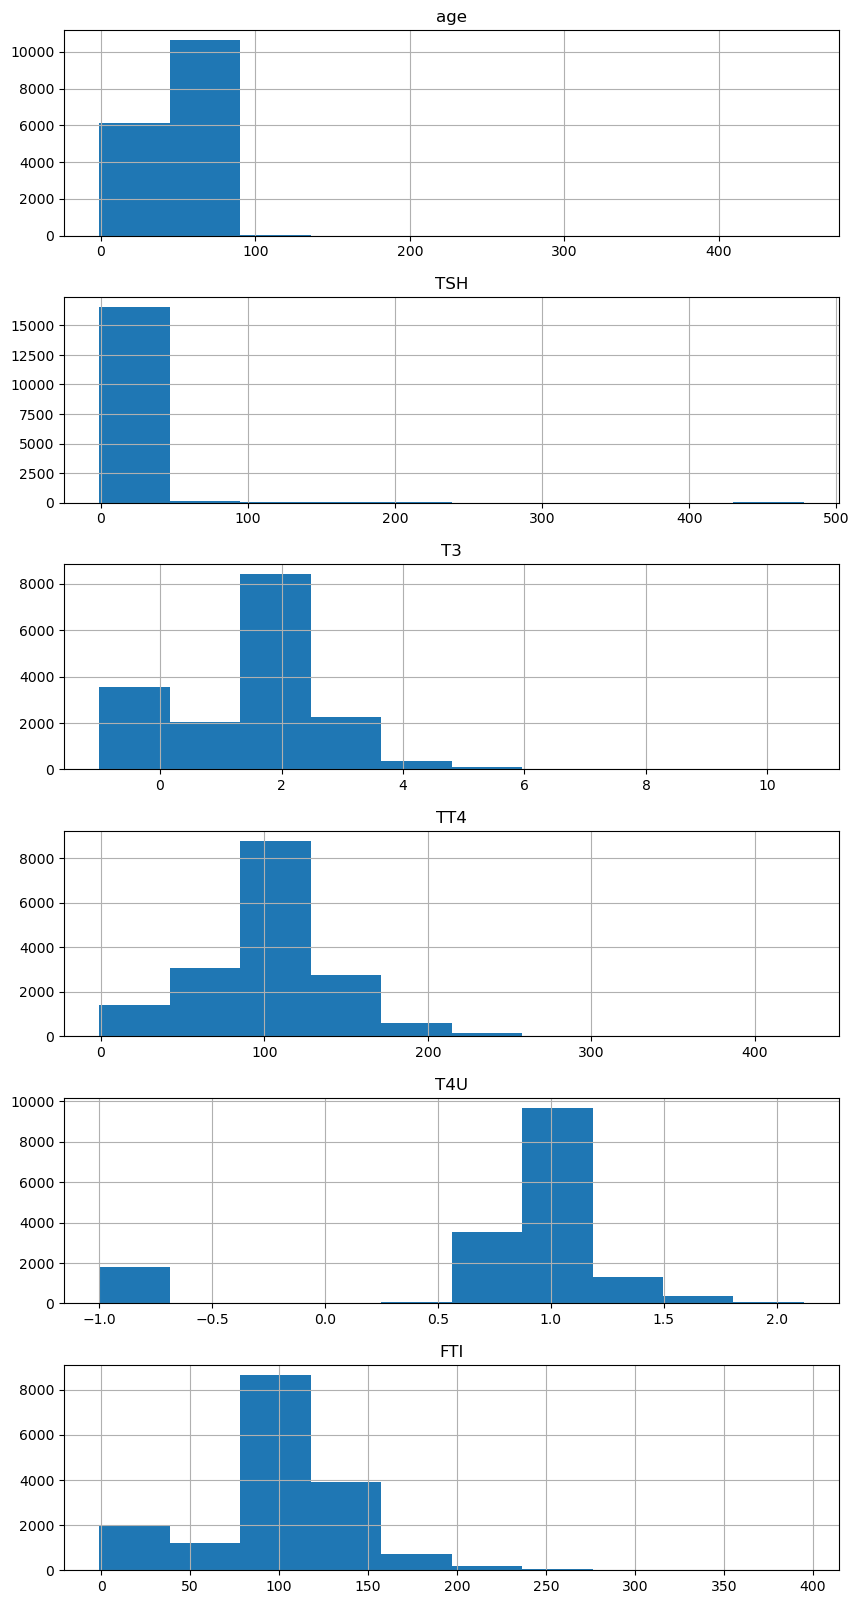

In [674]:
fig, axes = plt.subplots(len(columns_with_continuous), 1, figsize = [10, 20])
count = 0
for column_with_continuous in columns_with_continuous:
    df.hist(column = column_with_continuous, ax=axes[count])
    count += 1
plt.show()

Break down the visualization based on class value instead of looking at overall

KeyError: 'underreplacement'

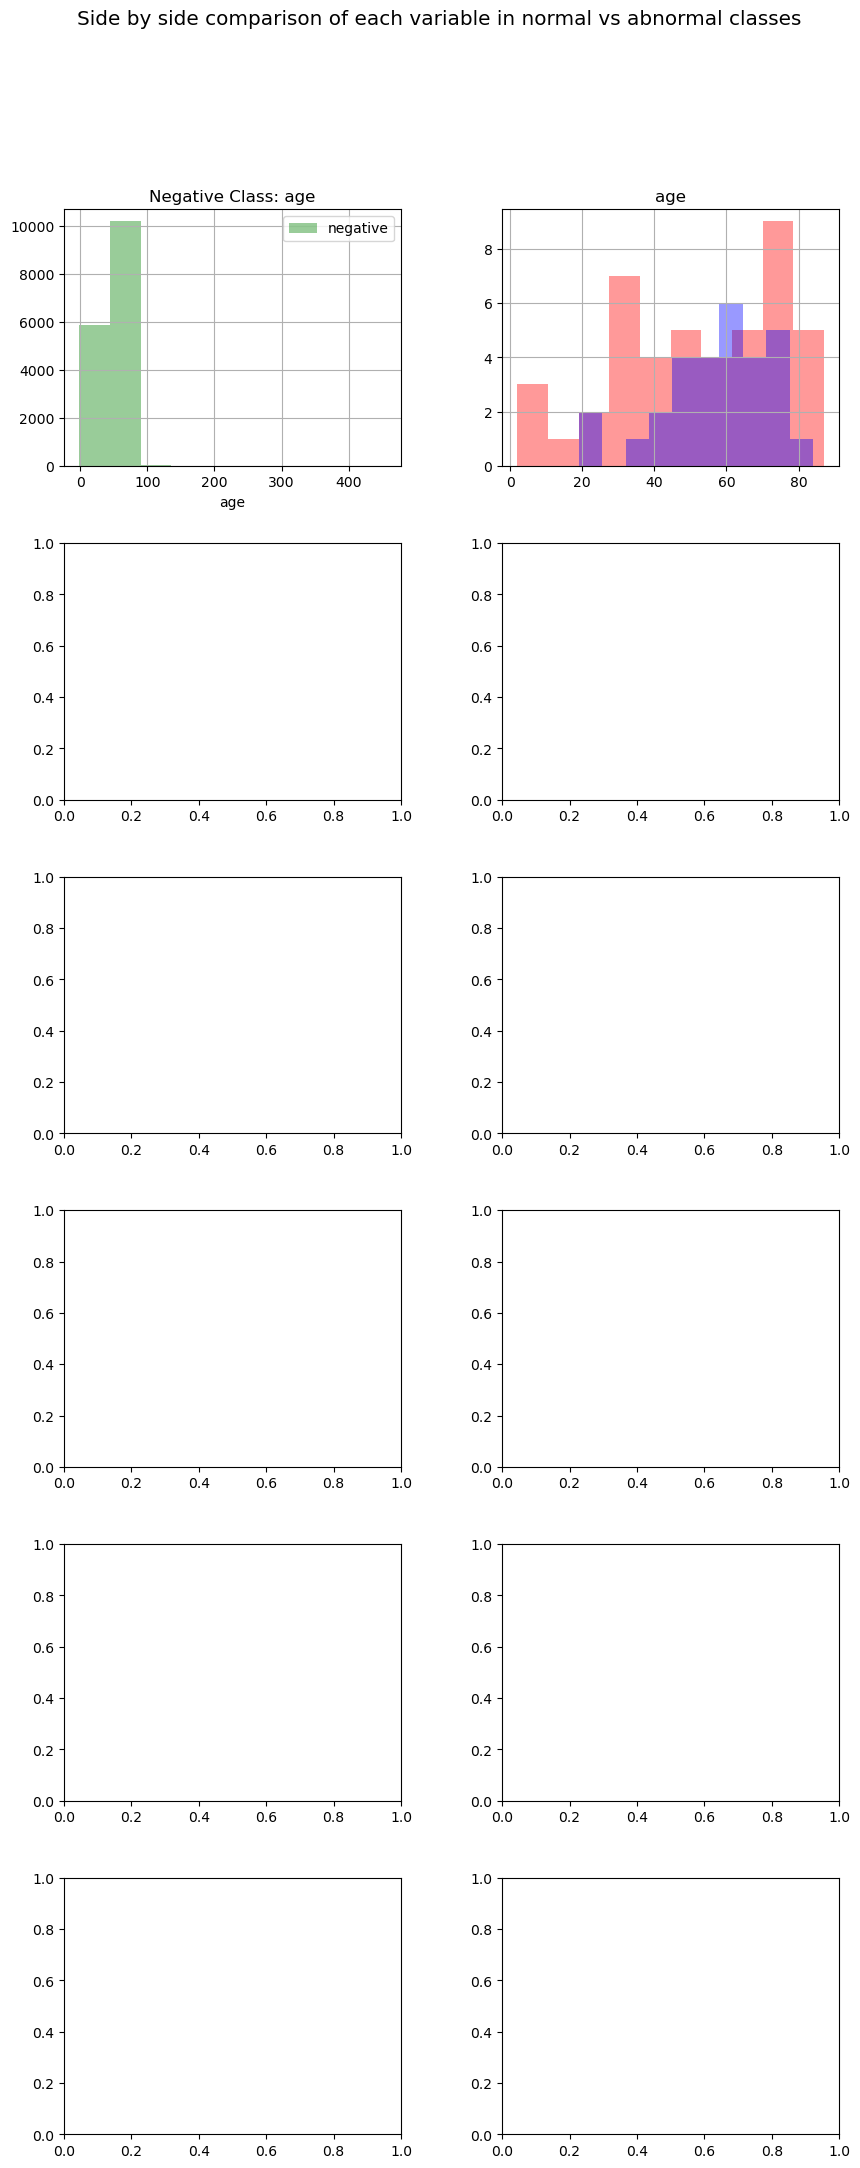

In [676]:
# To create a plot with common big title across columns
# Reference: https://stackoverflow.com/questions/40936729/matplotlib-title-spanning-two-or-any-number-of-subplot-columns

# Instantiate the canvas that host the plot
fig, axes = plt.subplots(
    nrows=len(columns_with_continuous), 
    ncols=2, 
    figsize=[10, 25]
)

# Add suptitle
fig.suptitle("Side by side comparison of each variable in normal vs abnormal classes", 
             fontsize='x-large', 
             y=0.96)

# Separate class between negative and others
# where I think negative are the data points that are not having disease, 
# versus others are those data points having issues
abnormal_classes = list(df['class'].unique())
abnormal_classes.remove('negative')
# Define a color scheme for the graph per each class
dict_of_key_class_value_color = dict(zip(abnormal_classes, ['r', 'b']))

# Plot each row with separate x-axis but shared x within the row
for count, column_with_continuous in enumerate(columns_with_continuous):
    # Left subplot: negative class
    df[df['class'] == 'negative'].hist(
        column=column_with_continuous, 
        ax=axes[count][0], 
        color='g', 
        alpha=0.4
    )
    axes[count][0].set_title(f"Negative Class: {column_with_continuous}")
    axes[count][0].set_xlabel(column_with_continuous)
    axes[count][0].legend(["negative"])

    # Right subplot: abnormal classes
    for abnormal_class in abnormal_classes:
        df[df['class'] == abnormal_class].hist(
            column=column_with_continuous,
            ax=axes[count][1],
            color=dict_of_key_class_value_color[abnormal_class],
            alpha=0.4
        )
    axes[count][1].set_title(f"Abnormal Classes: {column_with_continuous}")
    axes[count][1].set_xlabel(column_with_continuous)
    axes[count][1].legend(abnormal_classes)

    # Ensure both subplots in the row share the same x-axis
    axes[count][1].sharex(axes[count][0])  # Only sharing within the row

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Notice that the `TSH` variable is quite left skewed so it may be a good idea to apply transformation to make the variable look more normal

Examine the log transformed `TSH` variable

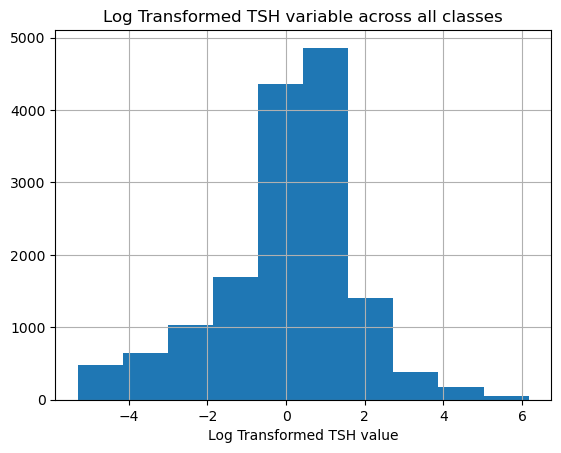

In [677]:
np.log(df['TSH']).hist()
plt.title("Log Transformed TSH variable across all classes")
plt.xlabel("Log Transformed TSH value")
plt.show()

Examine the log transformed `TSH` variable based on each class status

KeyError: 'underreplacement'

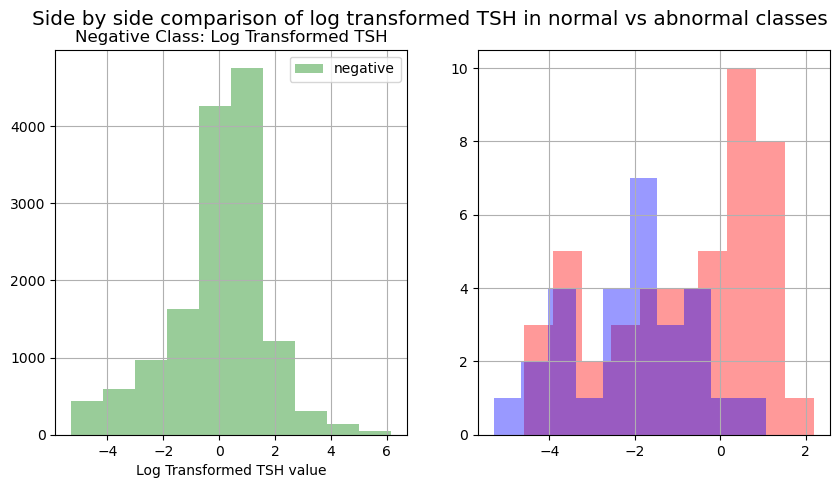

In [679]:
fig, axes = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=[10, 5]
)

# Add suptitle
fig.suptitle("Side by side comparison of log transformed TSH in normal vs abnormal classes", 
             fontsize='x-large', 
             y=0.96)


# Left subplot: negative class
np.log(df[df['class'] == 'negative']['TSH']).hist(
    ax=axes[0], 
    color='g', 
    alpha=0.4
)
axes[0].set_title("Negative Class: Log Transformed TSH")
axes[0].set_xlabel('Log Transformed TSH value')
axes[0].legend(["negative"])

# Right subplot: abnormal classes
for abnormal_class in abnormal_classes:
    np.log(df[df['class'] == abnormal_class]['TSH']).hist(
        ax=axes[1],
        color=dict_of_key_class_value_color[abnormal_class],
        alpha=0.4
    )
axes[1].set_title("Abnormal Classes: Log Transformed TSH")
axes[1].set_xlabel('Log Transformed TSH value')
axes[1].legend(abnormal_classes)

# Ensure both subplots in the row share the same x-axis
axes[1].sharex(axes[0])  # Only sharing within the row

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show

Examine the missingness of the columns and see if it is due to corresponding *_measured having 0

In [ ]:
columns_with_question_mark_values = df.columns[(df == -1).any()].to_list()
columns_with_question_mark_values.remove('age')

fig, axes = plt.subplots(
    nrows=len(columns_with_question_mark_values), 
    ncols=1, 
    figsize=[10, 15]
)

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()


for count, (ax, column_with_question_mark_values) in enumerate(zip(axes, columns_with_question_mark_values)):
    ax.scatter(x = df[f'{column_with_question_mark_values}_measured'],
                y = df[column_with_question_mark_values],
               )
    ax.set_xlabel(f"{column_with_question_mark_values}_measured values ")
    ax.set_ylabel(f"{column_with_question_mark_values} values")
    
plt.tight_layout()
plt.show()

Notice that for some of the graph, the value -1 is not showing up clearly for *_measured to have a value of 0. So explore further what is going on

In [ ]:
df['TSH'].describe()

In [ ]:
plt.scatter(df['TSH_measured'], df['TSH'])
plt.xlabel('TSH_measured')
plt.ylabel('TSH')
plt.show()

Explore alternative ways to show that rows with `TSH_measured` == 0 has `TSH` = -1

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Scatter plot
fig, ax = plt.subplots()
ax.scatter(df['TSH_measured'], df['TSH'])

# Add zoom-in inset
axins = inset_axes(ax, width="30%", height="30%", loc='upper left')
axins.scatter(df['TSH_measured'], df['TSH'], color='purple')
axins.set_xlim(-0.5, 1.5)  # Zoom-in region for x
axins.set_ylim(-10, 50)    # Zoom-in region for y
axins.set_title('Zoomed In')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Inset Zoom')
plt.grid(True)
plt.show()

In [ ]:
# Highlight the points where TSH_measured == 0
special_points = df[df['TSH_measured'] == 0]

plt.scatter(df['TSH_measured'], df['TSH'], label='All Points')
plt.scatter(special_points['TSH_measured'], special_points['TSH'], color='red', label='(0, -1)')

# Add labels and legend
plt.xlabel('TSH_measured')
plt.ylabel('TSH')
plt.legend()
plt.show()

In [ ]:
all(df[df['TSH_measured'] == 0]['TSH'] == -1)

### Data Exploration After Visualization

Notice that there are values that are quite different from majority of the curve so examine further to see if there are any issues. Note: the -1 values are due to converting the `?` value to -1 so that I can separately identify the values

In [681]:
df[df['age'] >= 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
1364,455,F,False,False,False,False,False,False,False,False,...,True,2.0,True,118.0,True,1.13,True,104.0,SVI,negative
4164,455,F,False,False,False,False,False,False,False,False,...,True,2.0,True,118.0,True,1.13,True,104.0,SVI,negative
6964,455,F,False,False,False,False,False,False,False,False,...,True,2.0,True,118.0,True,1.13,True,104.0,SVI,negative
9764,455,F,False,False,False,False,False,False,False,False,...,True,2.0,True,118.0,True,1.13,True,104.0,SVI,negative
12564,455,F,False,False,False,False,False,False,False,False,...,True,2.0,True,118.0,True,1.13,True,104.0,SVI,negative
15364,455,F,False,False,False,False,False,False,False,False,...,True,2.0,True,118.0,True,1.13,True,104.0,SVI,negative


It is impossible for any individual to have an age of over 110 (based on https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people), so these data entries likely was due to an entry mistake. So I decide to drop this row from my analysis

In [ ]:
df.drop(labels=1364, axis=0, inplace=True)
df

Sanity check row dropped was performed

In [ ]:
assert df.shape[0] == num_observation - 1

Reset index of the rows after row drop is performed to ensure index consistency

In [ ]:
df.reset_index(drop=True, inplace=True)
df

Examine how many rows of data would be dropped if I ignore all the missing values

In [684]:
index_where_missing_value = []
for column_with_question_mark_values in columns_with_question_mark_values:
    series_of_column_with_missing_value = df[column_with_question_mark_values] == -1
    index_where_missing_value.extend(
        (series_of_column_with_missing_value)[series_of_column_with_missing_value].index.tolist())
print(len(pd.Series(index_where_missing_value).unique()))

4626


Too many rows of data is going to be dropped if I proceed with this (771/2999 $\approx$ 0.25). So I need to be cautious and strategic about what dimensions do I care about and is relevant to the analysis. 

In [ ]:
columns_with_question_mark_values

In [ ]:
for result in df['class'].unique():
    print(f'class = {result}')
    print(f"contain any missing value = {any(df[df['class'] == result]['TSH'] == -1)}")

In [ ]:
print((df[df['class'] == 'increased_binding_protein']['TSH'] == -1)[(df[df['class'] == 'increased_binding_protein']['TSH'] == -1)].index)

In [ ]:
df.iloc[423]

### Feature Engineering

### One Hot Encoding

Converting referral_source andd sex columns into encoded values

In [686]:
column_names_using_one_hot = ['sex', 'referral_source']

one_hot_encoder = OneHotEncoder(sparse_output=False)
# Iterate through columns to create one-hot encoded values for categorical columns
for column_name_using_one_hot in column_names_using_one_hot:
    # Transform categorical columns into one-hot
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column_name_using_one_hot]])
    # Retreive back the column name
    column_name = one_hot_encoder.get_feature_names_out([column_name_using_one_hot])
    # Create a dataFrame that stores the one-hot-encoded value
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_name)
    # Add one-hot-encoded columns to the original dataframe
    df = pd.concat([df, one_hot_df], axis=1)
    

# Drop original columns in the dataframe
df.drop(labels=column_names_using_one_hot, axis=1, inplace=True)

Add a variable named `log_TSH` into the dataset based on prior discovery

In [688]:
df['log_TSH'] = np.log(df['TSH'])
df

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,class,sex_-1,sex_F,sex_M,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,log_TSH
0,41,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.262364
1,23,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.410987
2,46,False,False,False,False,False,False,False,False,False,...,negative,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.020203
3,70,True,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.832581
4,70,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.328504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,70,False,False,False,False,False,False,False,False,False,...,negative,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.993252
16796,73,False,True,False,False,False,False,False,False,False,...,negative,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
16797,75,False,False,False,False,False,False,False,False,True,...,negative,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
16798,60,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.336472


## Modeling

## Evaluation

### Load in the testing dataset

Identify the testing files in the folder structure

In [413]:
testing_files = IdentifyTestingFiles()

./data/thyroid+disease//dis.data
./data/thyroid+disease//allrep.data
./data/thyroid+disease//allhyper.data
./data/thyroid+disease//sick.data
./data/thyroid+disease//allhypo.data
./data/thyroid+disease//allbp.data
['./data/thyroid+disease//allbp.test', './data/thyroid+disease//allhypo.test', './data/thyroid+disease//allhyper.test', './data/thyroid+disease//allrep.test', './data/thyroid+disease//dis.test', './data/thyroid+disease//sick.test']


Populate the master test set and assign the column name to the test set

In [530]:
df_testing = PopulateMasterTestSet(testing_files)
df_testing.columns = col_names
df_testing.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,35,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,...,t,108,t,0.96,t,113,f,?,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,...,t,61,t,0.82,t,75,f,?,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,...,t,145,t,1.03,t,141,f,?,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,...,t,120,t,0.84,t,143,f,?,SVI,negative.|487


### Perform exact transformation to the testing dataset

Examine the test dataset to see if the same columns have only 1 value

In [488]:
df_testing.TBG.unique()

array(['?'], dtype=object)

In [490]:
df_testing.TBG_measured.unique()

array(['f'], dtype=object)

The columns `TBG measured` and `TBG` have the same exact values across all 6 datasets, so it doesn't provide any value in terms of using those columns to predict the outcome variables

In [536]:
df_testing.drop(columns=['TBG_measured', 'TBG'], axis=1, inplace=True)
df_testing

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
0,35,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,...,t,2.5,t,108,t,0.96,t,113,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,...,t,2.4,t,61,t,0.82,t,75,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,...,t,2.1,t,145,t,1.03,t,141,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,...,t,1.3,t,120,t,0.84,t,143,SVI,negative.|487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative.|2924
5828,68,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124,t,1.08,t,114,SVI,negative.|974
5829,74,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112,t,1.07,t,105,other,negative.|1493
5830,72,M,f,f,f,f,f,f,f,f,...,t,2,t,82,t,0.94,t,87,SVI,negative.|252


Sanity check column removed

In [538]:
assert all([dropped_column not in df_testing.columns for dropped_column in ['TBG_measured', 'TBG']])

In [540]:
assert df_testing.shape[1] == num_attribute - 2

Cleanup the class column to only have the class value, and each class value is 1 word without spacing

In [542]:
df_testing['class'] = df_testing['class'].apply(lambda x: x[:x.index('.')])
df_testing['class'] = df_testing['class'].apply(lambda x: x.replace(' ', '_'))

Cleanup the columns with `t` and `f` to be `True` and `False`

In [544]:
columns_with_t_f = [col_name for col_name in df_testing.columns 
                    if list(df[col_name].unique()) == ['f', 't'] 
                    or list(df[col_name].unique()) == ['t', 'f']]
for column_with_t_f in columns_with_t_f:
    df_testing[column_with_t_f] = df_testing[column_with_t_f].apply(lambda x: False if x == 'f' else True)
    # df_testing[column_with_t_f] = df_testing[column_with_t_f].apply(lambda x: 0 if x == 'f' else 1)

Identify the columns where there is `?` value

In [550]:
columns_with_missing_val = df_testing.columns[df_testing.isin(['?']).any()]
columns_with_missing_val

Index(['sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

Convert the values where there is `?` value to string value of -1

In [552]:
for column_with_missing_val in columns_with_missing_val:
    df_testing[column_with_missing_val] = df_testing[column_with_missing_val].apply(
        lambda x: '-1' if x == '?' else x)

Sanity check `?` is converted to a string value of -1

In [556]:
assert all(['?' not in df_testing[column] for column in df_testing.columns])

Identify the columns where values are supposed to be continuous

In [558]:
columns_with_continuous = [key for key in data_dictionary.keys() if data_dictionary[key] == ['continuous']]
columns_with_continuous.remove('TBG')
columns_with_continuous.remove('age') # Additional removal done because the age column is already a int64 type in the dataset
columns_with_continuous

['TSH', 'T3', 'TT4', 'T4U', 'FTI']

Convert columns where continuous value is expected

In [560]:
for column_with_continuous in columns_with_continuous:
    df_testing[column_with_continuous] = df_testing[column_with_continuous].apply(lambda x: float(x) if '.' in x else int(x))

Converting `referral_source` and `sex` columns into encoded values

In [564]:
column_names_using_one_hot = ['sex', 'referral_source']

one_hot_encoder = OneHotEncoder(sparse_output=False)
# Iterate through columns to create one-hot encoded values for categorical columns
for column_name_using_one_hot in column_names_using_one_hot:
    # Transform categorical columns into one-hot
    one_hot_encoded = one_hot_encoder.fit_transform(df_testing[[column_name_using_one_hot]])
    # Retreive back the column name
    column_name = one_hot_encoder.get_feature_names_out([column_name_using_one_hot])
    # Create a dataFrame that stores the one-hot-encoded value
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_name)
    # Add one-hot-encoded columns to the original dataframe
    df_testing = pd.concat([df_testing, one_hot_df], axis=1)
    

# Drop original columns in the dataframe
df_testing.drop(labels=column_names_using_one_hot, axis=1, inplace=True)

Add a variable named `log_TSH` into the dataset based on prior discovery

In [566]:
df_testing['log_TSH'] = np.log(df_testing['TSH'])
df_testing

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,class,sex_-1,sex_F,sex_M,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,log_TSH
0,35,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,63,False,False,False,False,False,False,False,False,False,...,negative,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.252763
2,25,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.526056
3,53,False,False,False,False,False,False,False,True,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.386294
4,92,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.356675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,30,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
5828,68,False,False,False,False,False,False,False,False,False,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
5829,74,False,False,False,False,False,False,False,False,True,...,negative,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.629241
5830,72,False,False,False,False,False,False,False,False,False,...,negative,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.356675


Sanity check Dtype change is done

In [691]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5832 non-null   int64  
 1   on_thyroxine               5832 non-null   bool   
 2   query_on_thyroxine         5832 non-null   bool   
 3   on_antithyroid_medication  5832 non-null   bool   
 4   sick                       5832 non-null   bool   
 5   pregnant                   5832 non-null   bool   
 6   thyroid_surgery            5832 non-null   bool   
 7   I131_treatment             5832 non-null   bool   
 8   query_hypothyroid          5832 non-null   bool   
 9   query_hyperthyroid         5832 non-null   bool   
 10  lithium                    5832 non-null   bool   
 11  goitre                     5832 non-null   bool   
 12  tumor                      5832 non-null   bool   
 13  hypopituitary              5832 non-null   bool 

### Predict using the model

### Compare the result with actual testing dataset class

## Fine Tuning

## Cleanup code

In [385]:
!rm {local_zip_file_location}
!rm -rf {local_folder_location}